# **Notebook de Análise de Dados de Saúde**
**SEU NOME:** -- Natália Almada --

Fonte dos dados: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# **Atividade Prática:**


1.   Você deve encontrar as celulas de texto que solicitem a explicação da célula ou conjunto de células logo abaixo delas e fazer uma explicação sucinta daquele trecho de código. Você pode fazer um comentário nas celulas principais.
2.   Você deve corrigir os erros nas células que apresentaram erros. Utilize o "Explain Error"





🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

> Importam o csv e verificam se existem dados nulos em alguma coluna



In [ ]:
# Importa csv
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# verifica se tem dados vazios (null)
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

> Explicar...

Usa a scikit-learn pra codificar as variáveis de categorias em um conjunto de dados, transformando as ariáveis de sexo, fumante e região em numerois (com a label encoder), para preparar os dados para serem usados na ML.

In [ ]:
from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

#smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

#Region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)



In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

> Calcula e ordena a correlação entre as variáveis (dataframe) e custos(charges)


In [ ]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Calcula a matrix dessa correlação já mencionada, cria uma mascara para ocultar a metade da matriz, para evitar redundancia no mapa. Depois, cria uma imagem e os eixos para o mapa de calor com o tamanho específico. Plota/mostra esse mapa utilizando a matrix de correlação, aplicando a mascara, definindo paleta das cores e fazendo as celulas quadradas.

<Axes: >

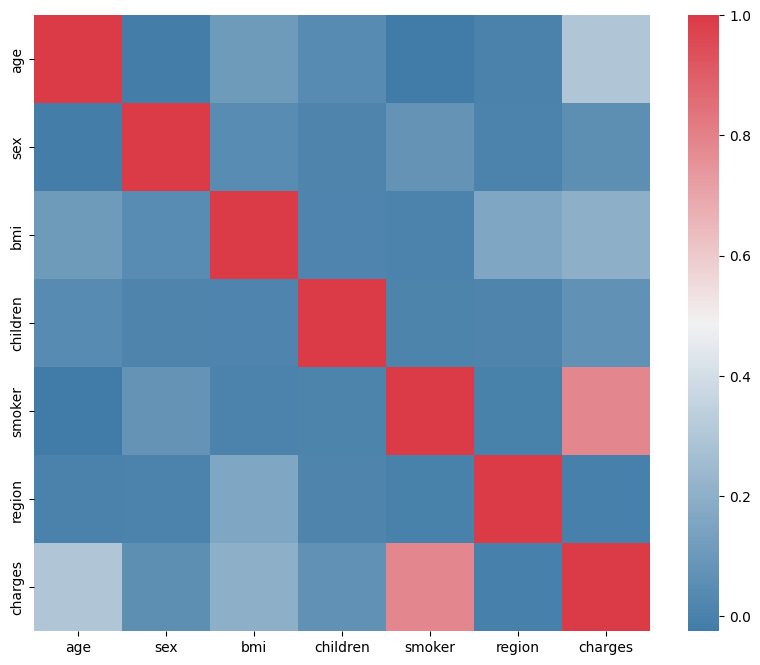

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩
A bokeh.io  serve para criar um histograma para mostrar a distribuição dos custos. Calcula o histograma dos valores da variável charges, cria retangulos pararepresentar os bins e depois adiciona rotulos para Xe Y. Plota o histogtgama.



In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot([p], ncols=2, toolbar_location=None))

Com a biblioteca Seaborn, cria dois subplots(graficos) em uma unica figura. Cada um deles represneta distribuição de custos para fumantes(esquerda) e não fumantes(direita).

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

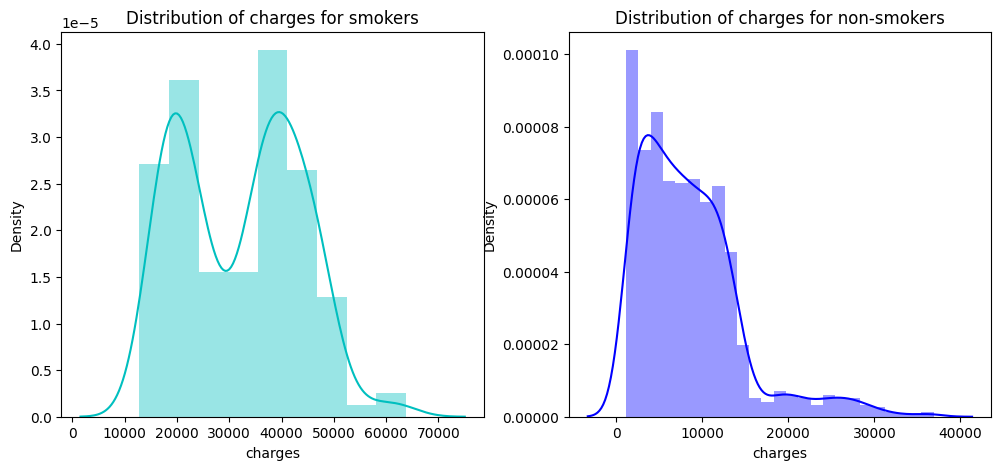

In [ ]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

criação de um grafico de contagem para a categoria fumantes e não fumantes, subdiviidos na categoria sexo

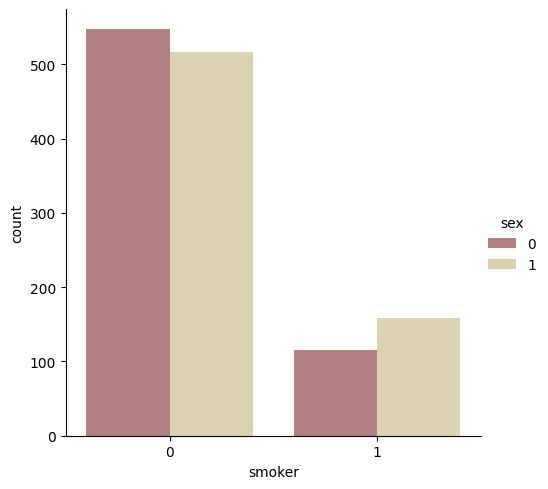

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

> Explicar...
criação de grafico do tipo boxplot para representar a distribução de custos das mulheres, diferenciando-as entre fumantes e não fumantes. Usando a paleta rosa(rosa, joão?)


<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

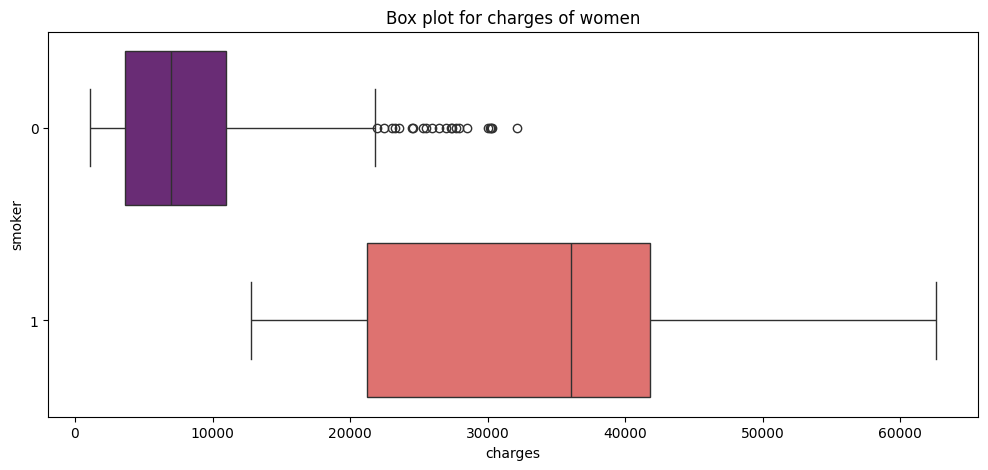

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

criação de grafico do tipo boxplot para representar a distribução de custos dos homens, diferenciando-as entre fumantes e não fumantes. Usando a paleta azul

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

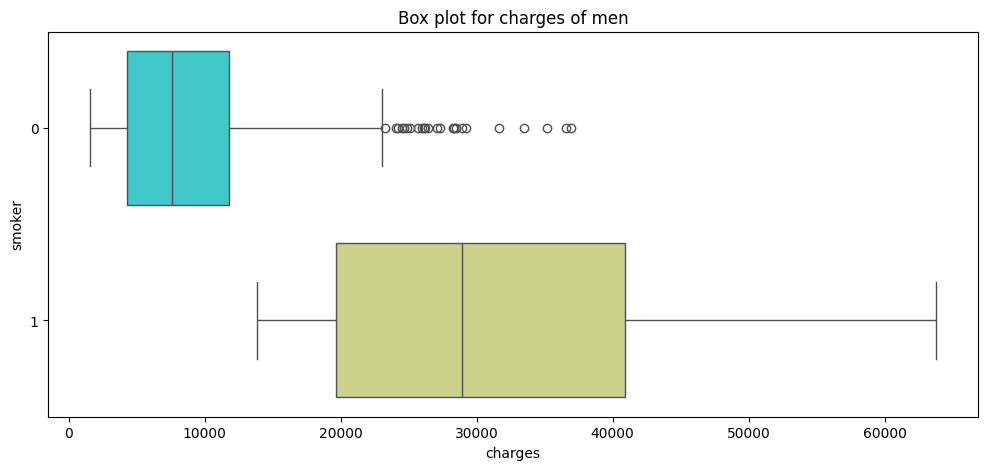

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

criação de histograma para visualizar a distribuição dos dados pela idade. Verde neutro.

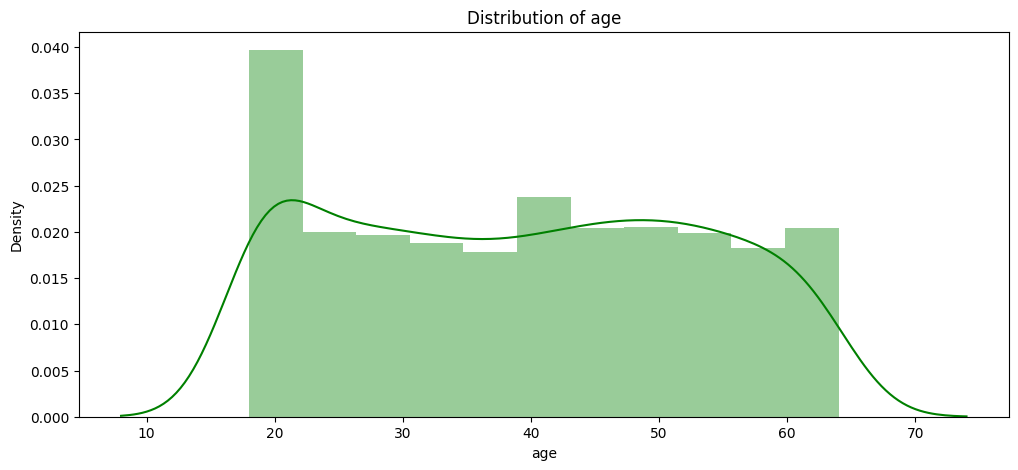

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

grafico de barras que mostra o número de fumantes e não fumantes de 18 anos de idade

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

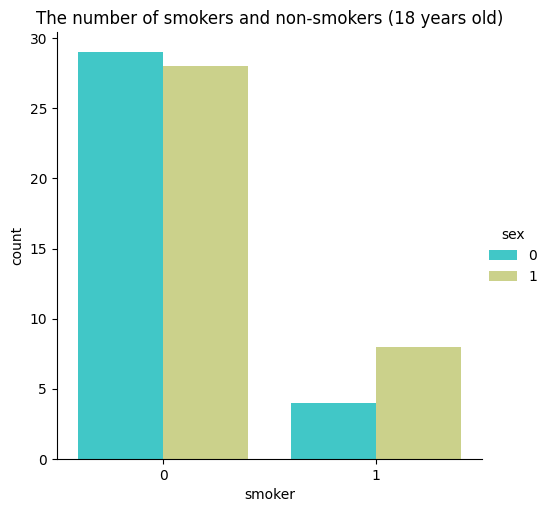

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

representação atraves do boxplot, de custos entre fumantes de 18 anos

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

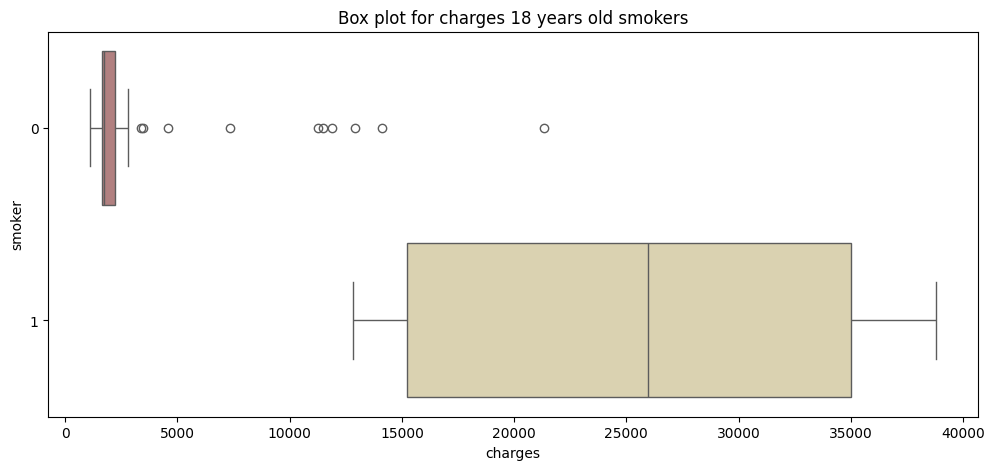

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

Grafico de dispresão(scatter) com contornos de densidade(kde) para mostrar associação entre idade e custos para nãoi fumantes


Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

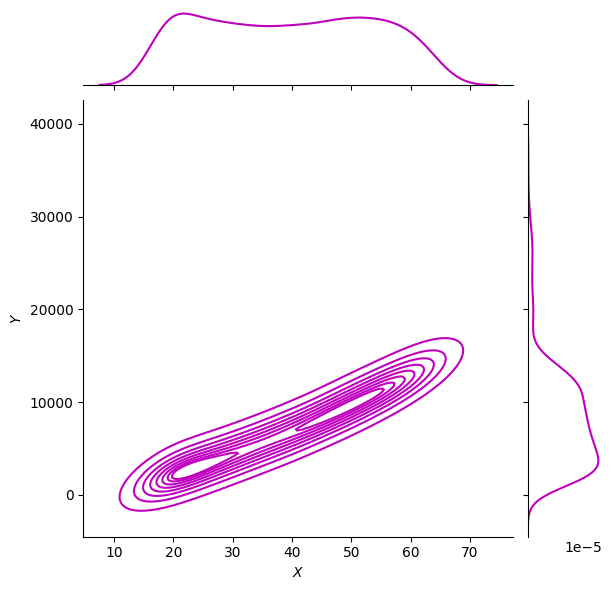

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Grafico de dispresão(scatter) com contornos de densidade(kde) para mostrar associação entre idade e custos para  fumantes

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

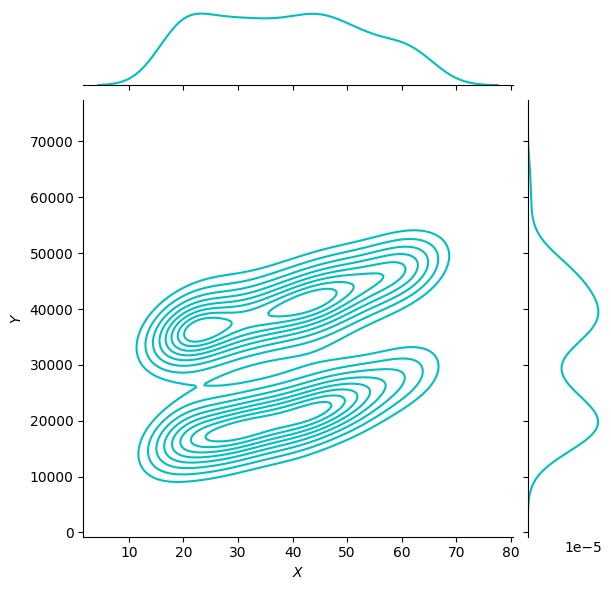

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

exibição de grafico de dispersao para ser visualizada a relaçao idade versus custos medicos para não fumantes

In [ ]:
from bokeh.plotting import figure, show
#non - smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

esse deveria fazera mesma coisa sobre fumantes mas por algum motivo não está lendo as informações de forma correta.

In [ ]:
from bokeh.plotting import figure, show
# smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [ ]:
Esse gera um grafico de dispersão que associa custos * idade para fumantes(laranjado) e não fumantes(roxo) simultaneamente

Text(0.5, 1.0, 'Smokers and non-smokers')

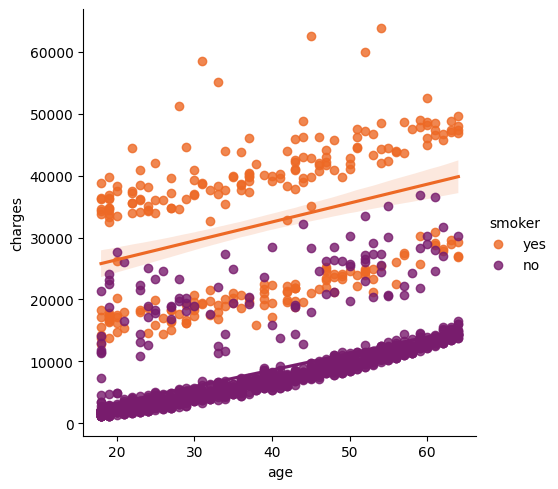

In [ ]:
import seaborn as sns
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

> Explicar...
Grafico de distribuição de IMC, associando densidade(eixo Y) com IMC(eixo X)


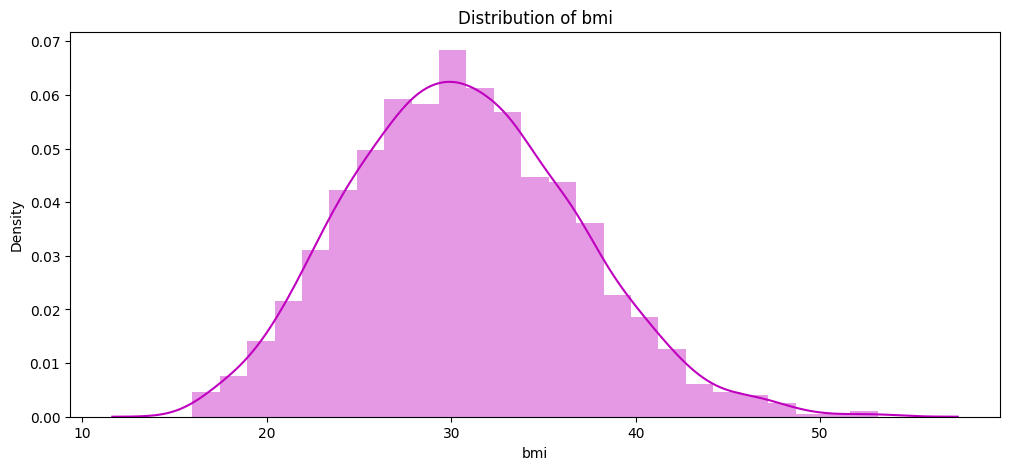

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

Grafico de distribuição de custos para pacientes com IMC>=30(obesos)

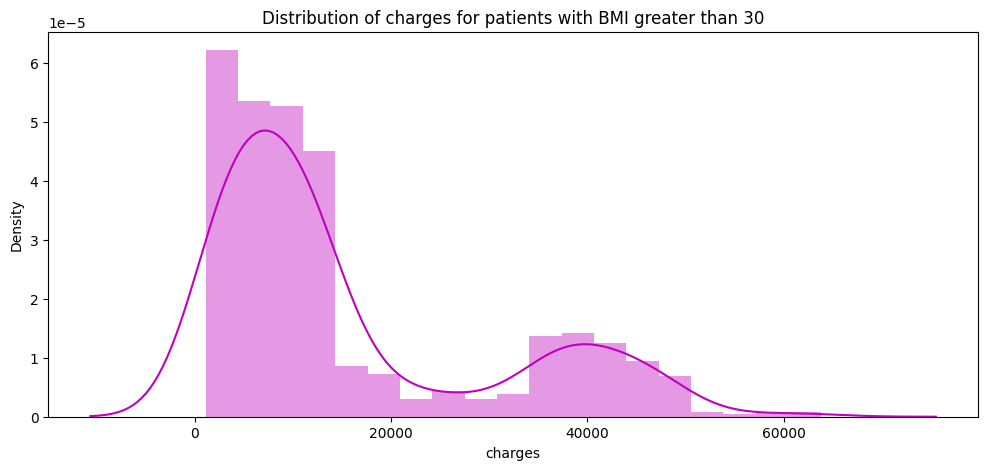

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

Grafico de distribuição de custos para pacientes com IMC< 30(obesos)

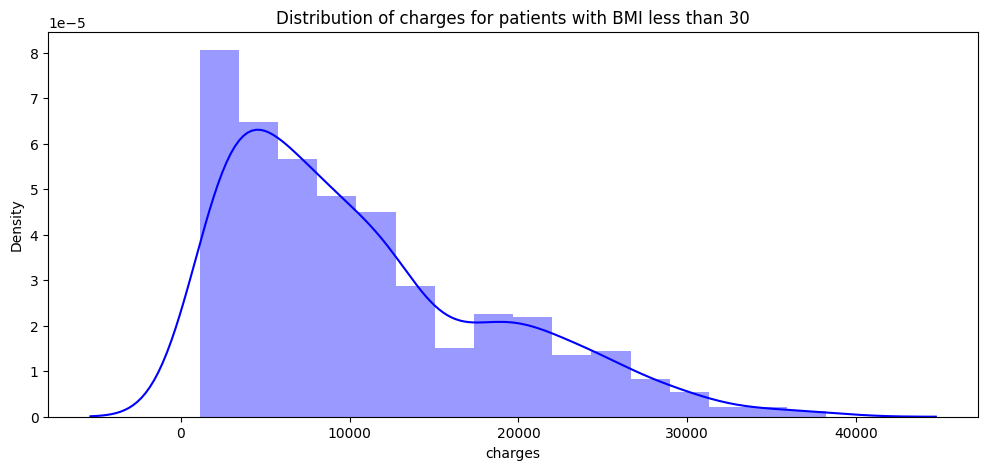

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Criação de um grafico de densidade conjunta, com as colunas de informação de IMC e de cobrancas,

Text(0.5, 1.0, 'Distribution of bmi and charges')

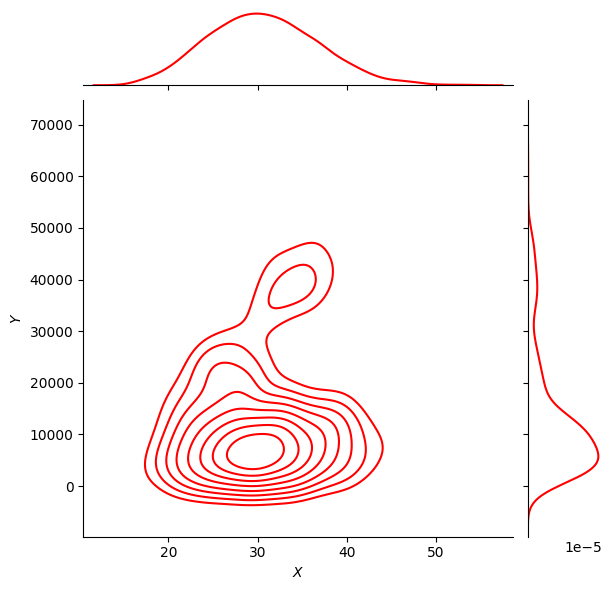

In [ ]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

esse mostra a associação de cobranças e imc, identificando grupos de fumantes e não fumantes

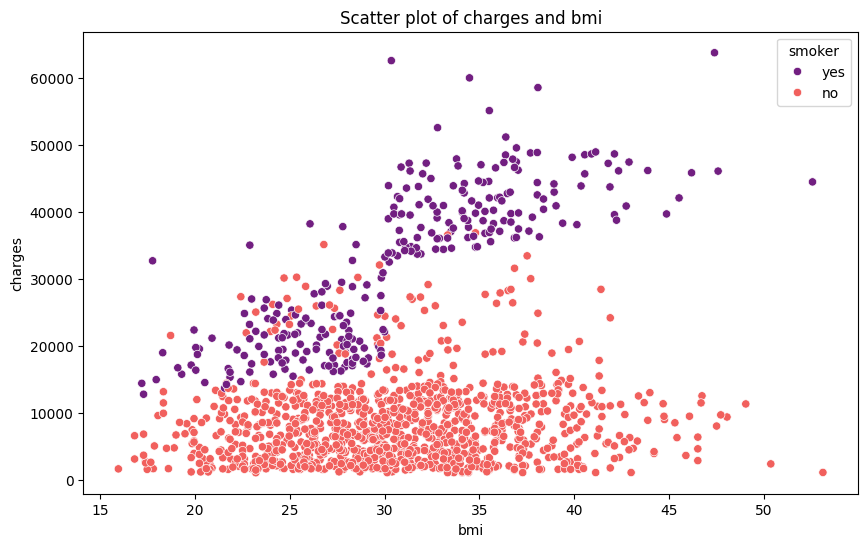

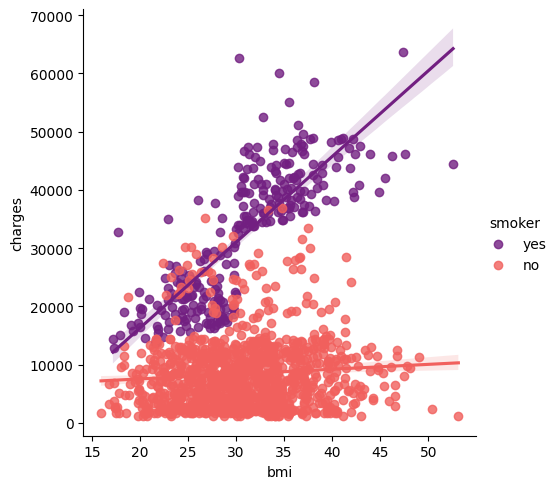

In [ ]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma')

mOSTRA APENAS UM GRAFICO DE CONTAGEM DE CRIANÇAS


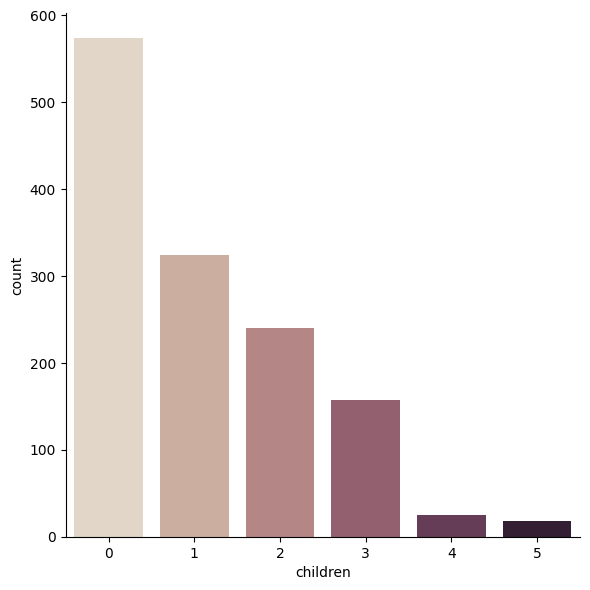

In [ ]:
import seaborn as sns
import pandas as pd

# Load your data into a Pandas DataFrame
data = pd.read_csv("insurance.csv")

# Create the count plot with the corrected argument
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height=6)

aSSOCIA QUANTIDADES DE FUMANTES QUE TEM CRIANÇAS, DIFERENCIANDO HOMENS E MULHERES POR COR

Text(0.5, 1.0, 'Smokers and non-smokers who have children')

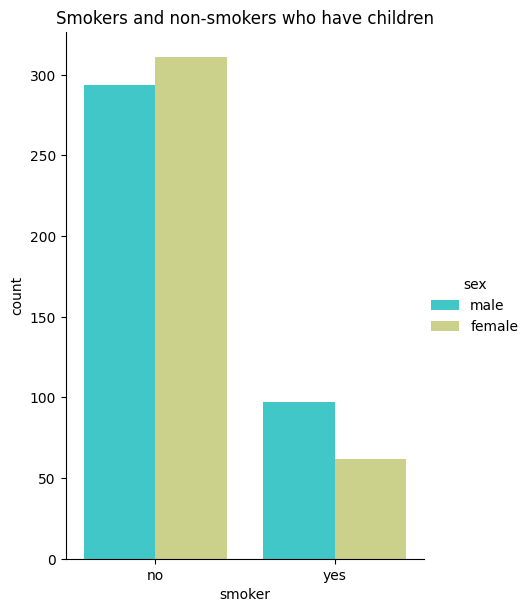

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load data (assuming data is already loaded into a DataFrame named "data")

# Create the catplot
sns.catplot(
    x="smoker",
    kind="count",
    palette="rainbow",
    hue="sex",
    data=data[(data.children > 0)],
    height=6,
    aspect=.75
)

# Set the plot title
plt.title("Smokers and non-smokers who have children")

# ⏺⏺⏺⏺⏺ **INÍCIO MACHINE LEARNING** ⏺⏺⏺⏺⏺

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

> Tem alguma coisa aqui que não tá dando certo e ainda não descobri como fazer funcionar. Fazem modelo de regressão linear com o scikit-learn (sklearn) para prever os custos (charges) baseando-se em outras variáveis do conjunto dos dados.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

ValueError: could not convert string to float: 'female'

🟩🟩🟩 ❗**O que as células seguintes fazem:**❓🟩🟩🟩

 Constroem dois modelos de gresessão: um polinomial de segundo grau e um de random forest, e avalia o desempemho dos dois modelos.


In [ ]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

ValueError: could not convert string to float: 'female'

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'poisson', 'absolute_error', 'friedman_mse'}. Got 'mse' instead.

In [ ]:
pl.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

NameError: name 'forest_train_pred' is not defined

<Figure size 1000x600 with 0 Axes>